False
175


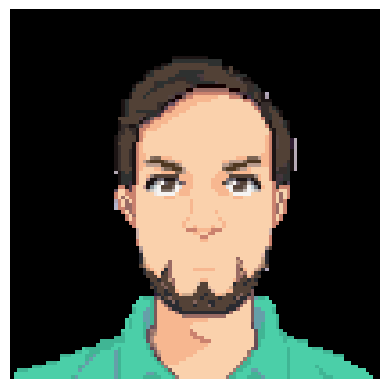

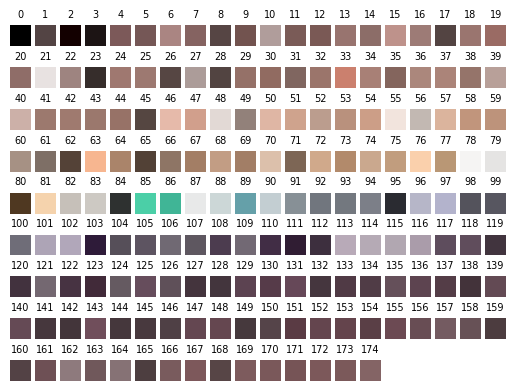

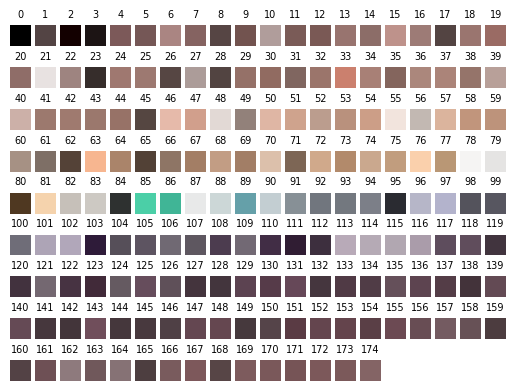

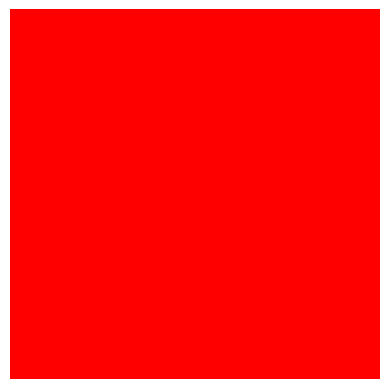

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

class recolourImage():
    def __init__(self):
        self.colourPaletter = []

    def getImage(self, image_path):
        self.img = cv2.imread(image_path)

    def dispColourPalette(self, colour_palette):
        num_colours = len(colour_palette)
        # print(num_colours)
        # Display the colour palette
        plt.figure()
        cols = 20
        rows = math.ceil(num_colours/cols)
        for idx, colour in enumerate(colour_palette):
            plt.subplot(rows, cols, idx+1)
            # convert to rgb
            colour =  cv2.cvtColor(np.uint8([[colour]]), cv2.COLOR_HSV2RGB)[0, 0, :]
            plt.imshow([[colour]], extent=(0, 1, 0, 1))
            plt.title(idx, fontsize=7)
            plt.axis('off')
    
    def showImg(self):
        # show image
        plt.figure()
        plt.imshow(cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    def getColourPalette(self):
        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        
        print(np.all(self.img == cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)))
        # colours = np.unique(hsv_image.reshape(-1, hsv_image.shape[2]), axis=0)
        colours = set(tuple(pixel) for row in hsv_image for pixel in row)
        print(len(colours))
        # Sort the colours set by Hue value
        self.colour_palette = sorted(colours, key=lambda x: x[0])

    def changeColuring(self):
        self.getColourPalette()
        self.dispColourPalette(self.colour_palette)

        for idx, col in enumerate(self.colour_palette):
            # change HSV to BGR

            mask = np.all(cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV) == col, axis=-1)
            self.img[mask] = np.array([0, 0, 255])

        self.dispColourPalette(self.colour_palette)

r = recolourImage()
r.getImage("Male103.png")
r.showImg()
r.changeColuring()
r.showImg()

plt.show()

In [ ]:
# pip install pillow scikit-learn
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

def quantize_colors(image_path, n, num_colours=3):
    # Open the image
    original_image = Image.open(image_path)

    # Check that the image is nxnx4
    if original_image.mode != 'RGBA':
        # change image to be nxnx4
        original_image = original_image.convert('RGBA')

    # Resize the image to n by n pixels
    img = original_image.resize((n, n))

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # print(img_array)
    # print(img_array.shape)

    # reshape into pixel and it's values
    pixels = img_array.reshape((-1, 4))
    # print(img_array.shape)
    # print(img_array)
    # print(pixels.shape)

    # Apply k-means clustering to find representative colors
    kmeans = KMeans(n_clusters=num_colours, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.predict(pixels)

    # Get the cluster centers (representative colors)
    cluster_centers = kmeans.cluster_centers_.astype(int)

    # print(labels.shape)
    # Reshape the labels back to the original image dimensions
    clustered_image = labels.reshape((n, n))

    # Display the original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')
    # Display the resized image
    plt.subplot(1, 3, 2)
    plt.title("Resized Image")
    plt.imshow(img)
    plt.axis('off')
    # Display the clustered image
    plt.subplot(1, 3, 3)
    plt.title("Clustered Image")
    plt.imshow(clustered_image, cmap='viridis')  # Change colour map if needed
    plt.axis('off')
    # Show the plots
    plt.show()

    # Display the colour palette
    plt.figure()
    for idx, colour in enumerate(cluster_centers):
        plt.subplot(1, num_colours, idx+1)
        plt.imshow([[colour]], extent=(0, 1, 0, 1))
        plt.title(idx, fontsize=7)
        print(idx, colour)
        plt.axis('off')
    plt.show()
    # Display each color as subplots
    plt.figure()

    return clustered_image, cluster_centers

def recolour(surf_map, keys, cols):
    # colour map
    colours = [(0, 0, 0), (1, 1, 1), (1, 0, 0), (0.5, 0.5, 0.5)]

    # custom_cmap = ListedColormap(colours)
    custom_cmap = ListedColormap(cols) # using the provided colours
    # custom_cmap = "plasma"

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(surf_map, cmap=custom_cmap)
    plt.axis('off')
    for i in range(surf_map.shape[0]):
        for j in range(surf_map.shape[1]):
            # check that the value exist in the key
            if surf_map[i][j] in keys:
                surf_map[i][j] = keys[surf_map[i][j]]
            else:
                # print(f"{surf_map[i][j]} not in the keys {keys} given")
                x = 1
    
    # Display the recoloured image
    plt.subplot(1, 2, 2)
    plt.title("Recoloured Image")
    plt.imshow(surf_map, cmap=custom_cmap)
    plt.axis('off')
    # Show the plots
    plt.show()



result_array, colours = quantize_colors("image2.png", 16, 4)

wrap = {0: 3, 1: 2, 2:1, 3:0}
recolour(result_array, wrap, colours/255)
print(result_array)
print(result_array.shape)

